#Import

In [1]:
from PIL import Image  # Import the Image module from Pillow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

#MNIST classification using CNN model

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.8848 - loss: 0.3713 - val_accuracy: 0.9754 - val_loss: 0.0812
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9819 - loss: 0.0588 - val_accuracy: 0.9852 - val_loss: 0.0548
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.9887 - loss: 0.0352 - val_accuracy: 0.9884 - val_loss: 0.0445
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9926 - loss: 0.0247 - val_accuracy: 0.9869 - val_loss: 0.0459
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9938 - loss: 0.0190 - val_accuracy: 0.9891 - val_loss: 0.0438
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


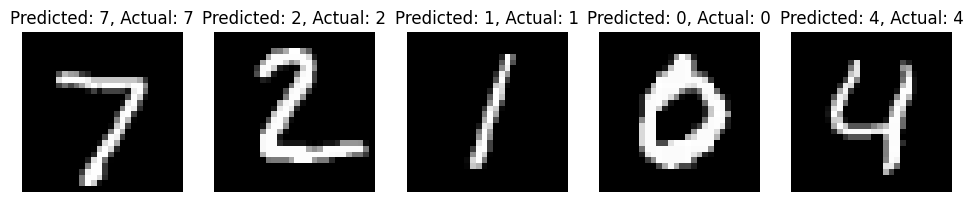

In [2]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the Data
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

# Build a Simple CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Make Predictions on Test Set
predictions = model.predict(x_test)

# Display Sample Predictions
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {tf.argmax(predictions[i]).numpy()}, Actual: {y_test[i]}")
    plt.axis('off')
plt.show()


#Object Detection

In [5]:
# Set up the environment
!git clone https://github.com/ultralytics/yolov5  # Clone the YOLOv5 repo
%cd yolov5
!pip install -r requirements.txt  # Install requirements

# Import libraries
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load a pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Load YOLOv5s model (small)


Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 19.57 MiB/s, done.
Resolving deltas: 100% (11695/11695), done.
/content/yolov5/yolov5


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-28 Python-3.10.12 torch-2.5.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 125MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
pip install requests


In [7]:
import requests

# Define the URL of the image
url = 'https://github.com/ultralytics/yolov5/releases/download/v1.0/zidane.jpg'

# Send a GET request to the URL
response = requests.get(url)

# Open a file in binary write mode
with open('zidane.jpg', 'wb') as f:
    f.write(response.content)

print("Image downloaded successfully!")


Image downloaded successfully!


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-28 Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


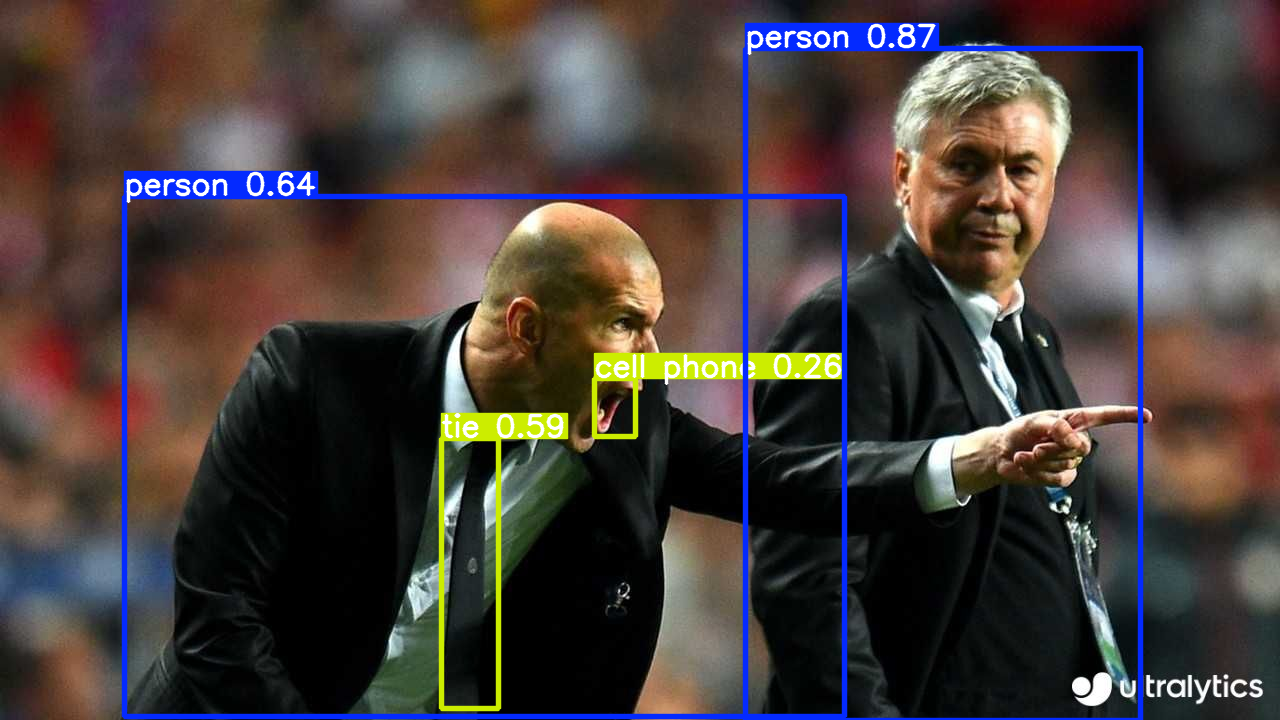

In [8]:
import torch

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Load the image
img = 'zidane.jpg'  # path to your image

# Perform inference
results = model(img)

# Show results
results.show()  # This will display the image with detections


In [10]:
img_path = '/content/game of thrones.jpeg'  # path to your image
image = Image.open(img_path)

# Resize the image
resized_image = image.resize((800, 600))

# Convert the resized image to a format compatible with the model (e.g., NumPy array)
# If your model requires a specific input format, you may need to adjust the image further.
img_array = np.array(resized_image)

# Perform inference
results = model(img_array)

# Show results
results.show()  # This will display the image with detections

# If you want to visualize the resized image
plt.imshow(resized_image)
plt.axis('off')
plt.title('Resized Image')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/game of thrones.jpeg'

In [ ]:
img_path = '/content/animals.jpeg'  # path to your image
image = Image.open(img_path)

# Resize the image
resized_image = image.resize((800, 600))

# Convert the resized image to a format compatible with the model (e.g., NumPy array)
# If your model requires a specific input format, you may need to adjust the image further.
img_array = np.array(resized_image)

# Perform inference
results = model(img_array)

# Show results
results.show()  # This will display the image with detections

# If you want to visualize the resized image
plt.imshow(resized_image)
plt.axis('off')
plt.title('Resized Image')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/animals.jpeg'

#Segmentation

In [11]:
pip install tensorflow tensorflow-datasets matplotlib numpy


#HomeWork2

Run this cell first to load the required dataset

In [24]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Preprocess the Data
X = X / 255.0  # Normalize pixel values to [0, 1]
y = y.astype(np.uint8)  # Convert labels to integers

#  Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##Part1 : In this section, we want to classify the MNIST dataset using Random Forest, Logistic Regression, and Neural Networks. We will print the accuracy for each model. The code for Random Forest will serve as an example, and you should complete the code for Logistic Regression and Neural Networks accordingly.

In [13]:
# Train Different Classifiers

# 1. Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


In [27]:
# 2. Logistic Regression"""
from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier
log_regressor = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='multinomial')
log_regressor.fit(X_train_scaled, y_train)
y_pred_logistic = log_regressor.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 91.56%


In [28]:
# 3. MLP (Neural Network)
from sklearn.neural_network import MLPClassifier

# Neural Network Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(64,), max_iter=20, alpha=1e-4,
                               solver='sgd', verbose=10, random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_classifier.predict(X_test_scaled)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'MLP (Neural Network) Accuracy: {accuracy_mlp * 100:.2f}%')


Iteration 1, loss = 1.09654520
Iteration 2, loss = 0.47270269
Iteration 3, loss = 0.36846981
Iteration 4, loss = 0.31779248
Iteration 5, loss = 0.28603227
Iteration 6, loss = 0.26325953
Iteration 7, loss = 0.24558283
Iteration 8, loss = 0.23124182
Iteration 9, loss = 0.21914499
Iteration 10, loss = 0.20894545
Iteration 11, loss = 0.20005358
Iteration 12, loss = 0.19217186
Iteration 13, loss = 0.18515493
Iteration 14, loss = 0.17881335
Iteration 15, loss = 0.17305534
Iteration 16, loss = 0.16782034
Iteration 17, loss = 0.16297895
Iteration 18, loss = 0.15853645
Iteration 19, loss = 0.15437759
Iteration 20, loss = 0.15048596
MLP (Neural Network) Accuracy: 94.42%


In [29]:
# Step 6: Print Accuracy Results
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')
print(f'Logistic Regression Accuracy: {accuracy_logistic * 100:.2f}%')
print(f'MLP (Neural Network) Accuracy: {accuracy_mlp * 100:.2f}%')


Random Forest Accuracy: 96.75%
Logistic Regression Accuracy: 91.56%
MLP (Neural Network) Accuracy: 94.42%


## Part2: take a photo of yourself, upload it to the jupyter notebook and detect your face using Yolo model

Saving Screenshot 2024-10-28 121726.png to Screenshot 2024-10-28 121726.png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-28 Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


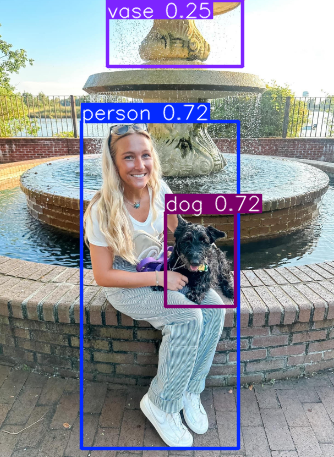

Saved 1 image to results


In [30]:
from google.colab import files  # For Google Colab, or use an appropriate file uploader for Jupyter.
uploaded = files.upload()  # Choose your image file, e.g., "my_photo.jpg"
img_path = list(uploaded.keys())[0]  # Get the path to the uploaded file
import torch
from matplotlib import pyplot as plt
from PIL import Image

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # 'yolov5s' is a small model suitable for testing

# Load the uploaded image
image = Image.open(img_path)

# Perform inference on the image
results = model(image)

# Show results
results.show()  # This will display the image with bounding boxes around detected objects

# If you want to save the result image with bounding boxes
results.save(save_dir='results/')  # This will save to the 'results/' folder
